**California Housing Price**

In [3]:

# Preprocessing
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Reading csv file
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#To check the shape of the data
def print_shape(df):
  print(df.shape)
print_shape(df)

(20640, 10)


In [6]:
#Checking the type of dataset
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#Check for NULL values#
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# description of the data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#object containing counts of unique values
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

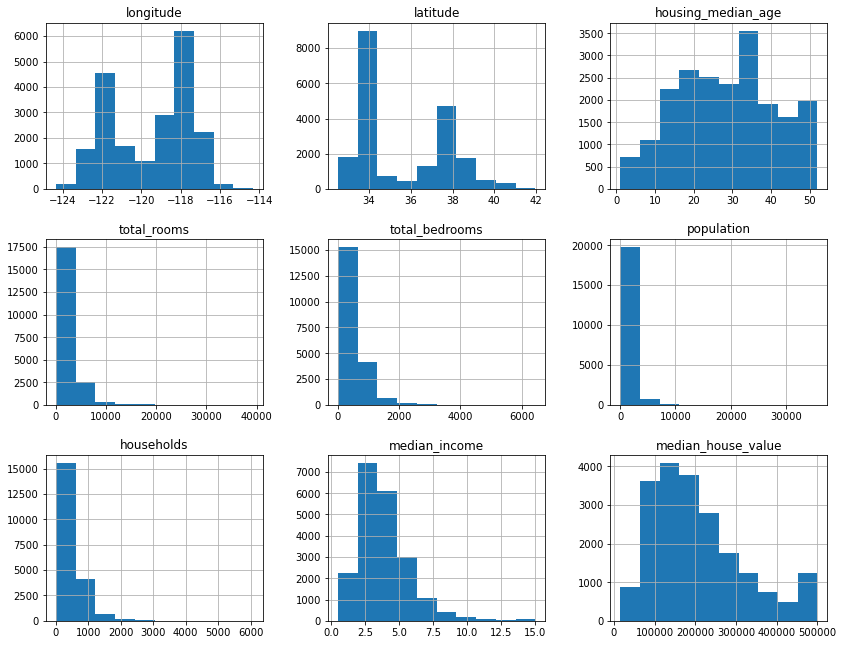

In [11]:
def print_histograms(df):
  df.hist(bins=10,figsize=(14,11))
print_histograms(df)

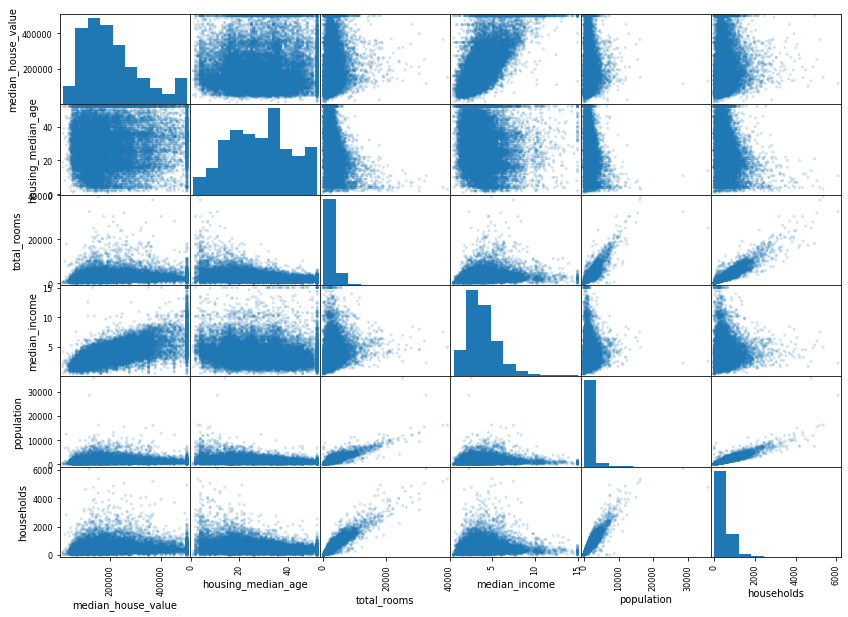

In [12]:
def print_scatter_matrix(data):
  df = data[['median_house_value','housing_median_age','total_rooms','median_income','population','households']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(14,10))
print_scatter_matrix(df) 

Text(0.5, 1.0, 'Distribution of households')

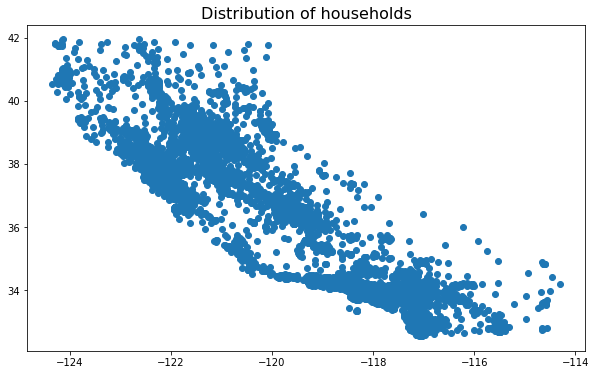

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'])
plt.title("Distribution of households",size=16)

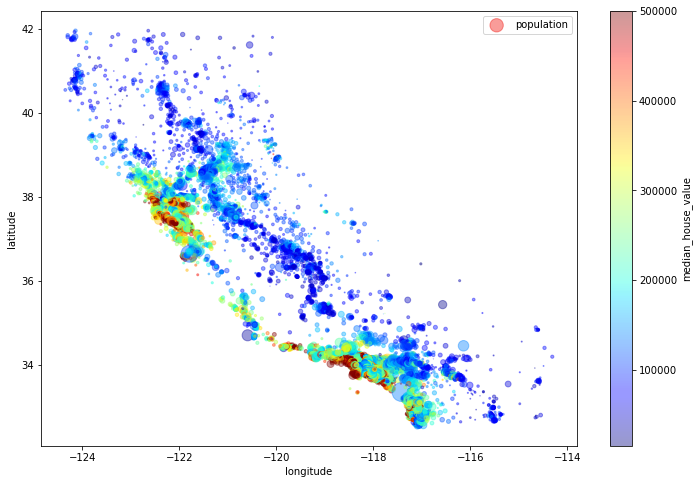

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=df['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

(0.0, 16.0, 0.0, 550000.0)

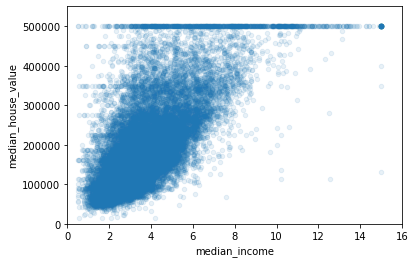

In [15]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

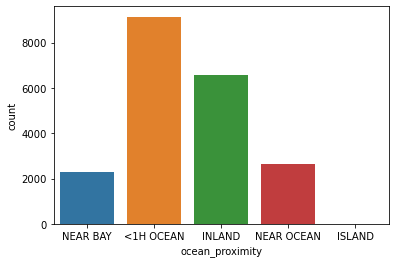

In [16]:
sns.countplot(x='ocean_proximity',data=df)

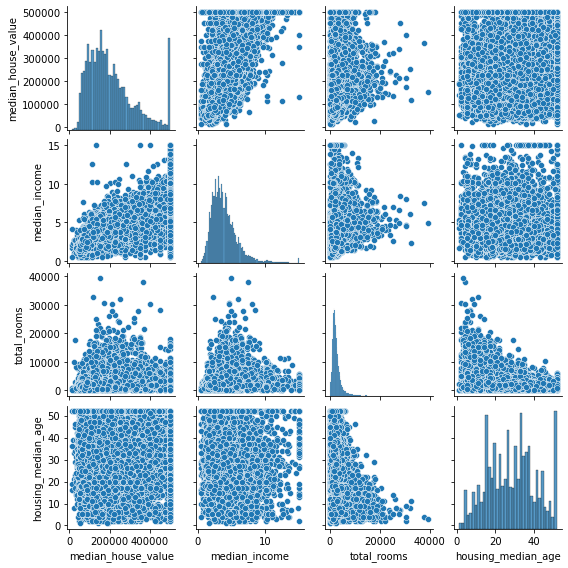

In [17]:
def print_pairplot(df):
  cols = ['median_house_value','median_income','total_rooms','housing_median_age']
  sns.pairplot(df[cols], height=2)
  plt.show()
print_pairplot(df)

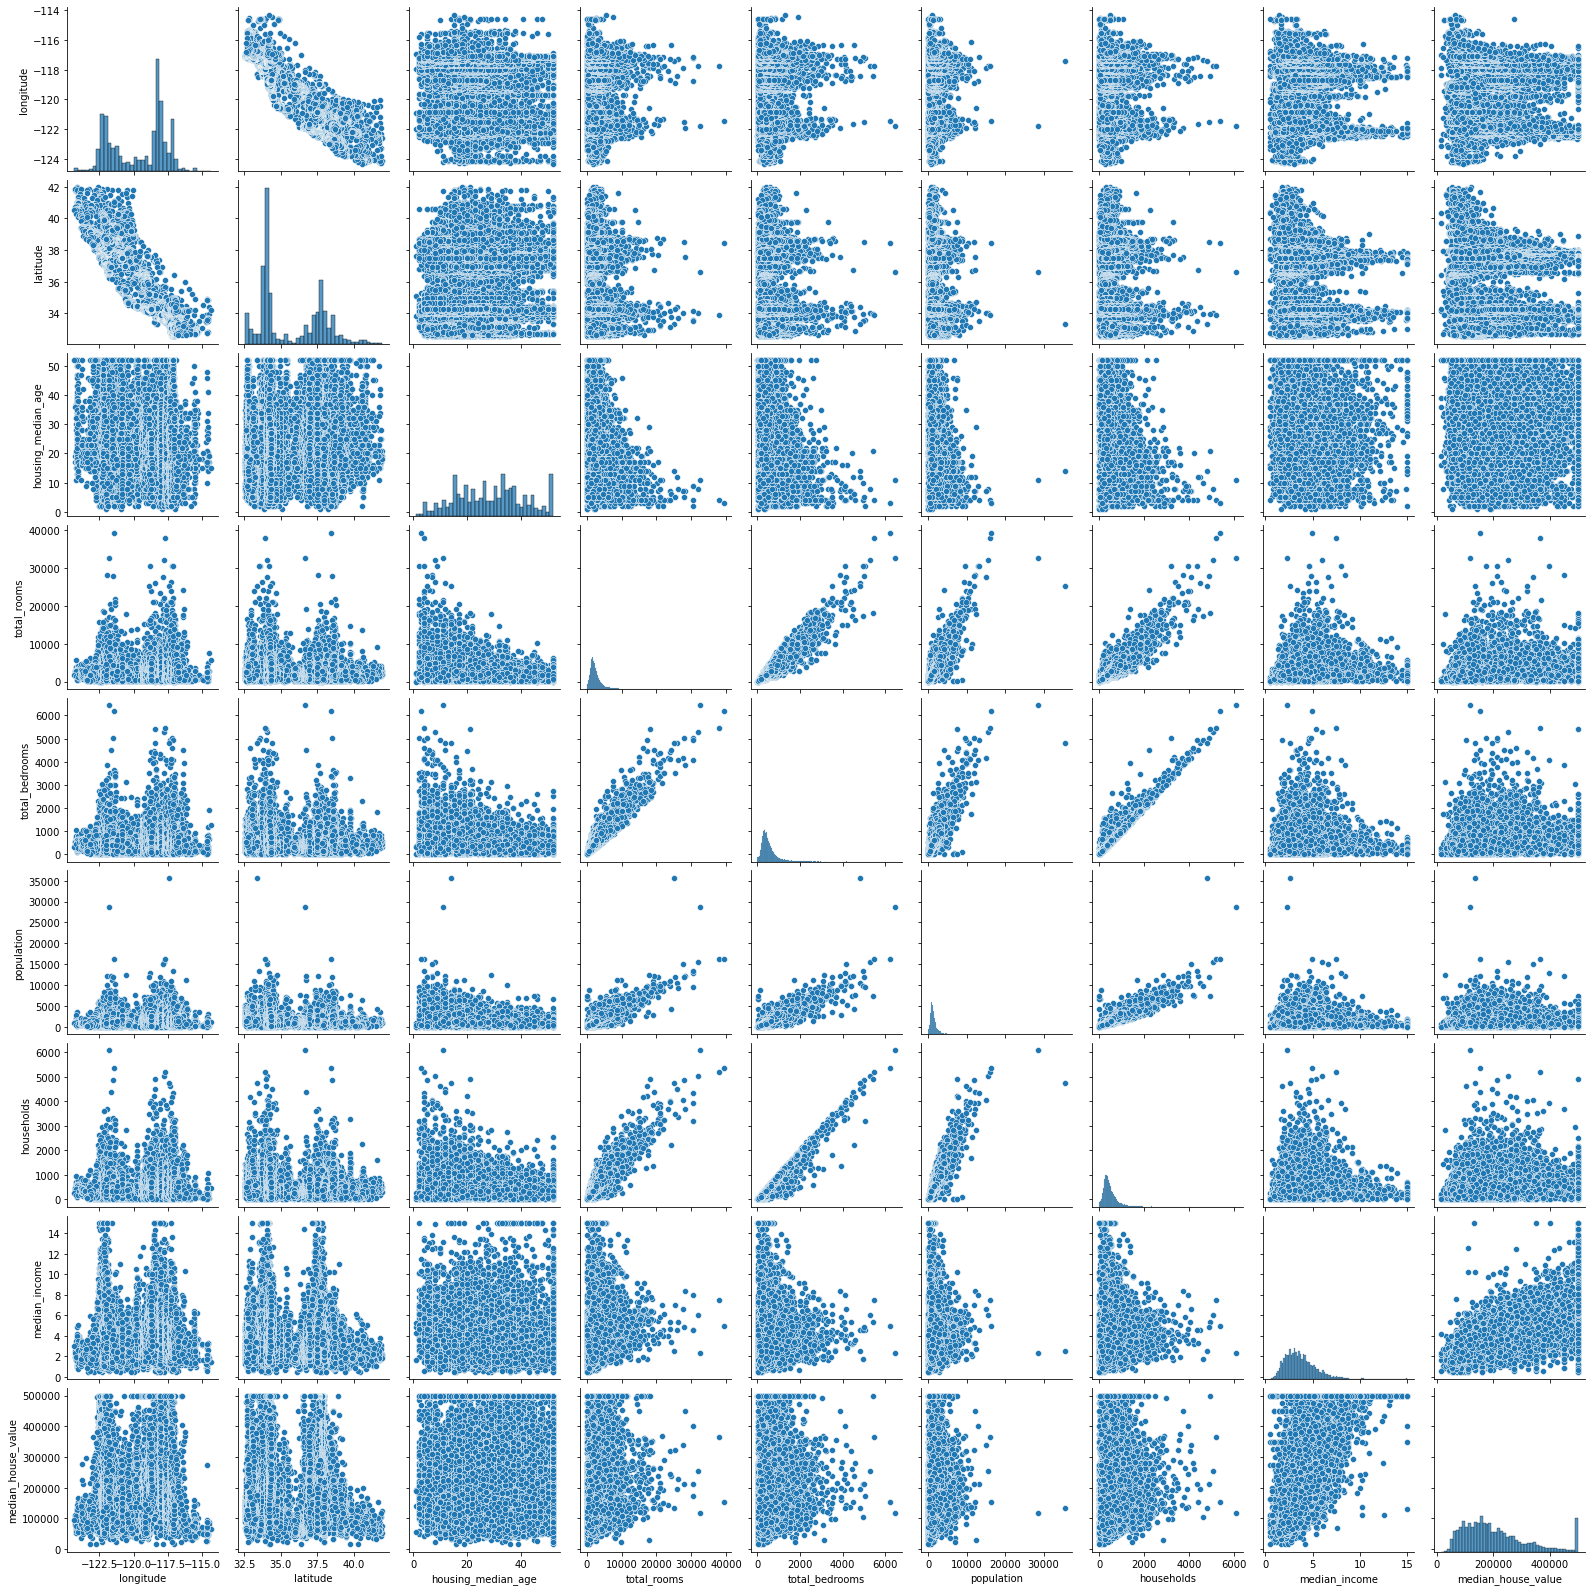

In [18]:
sns.pairplot(df)

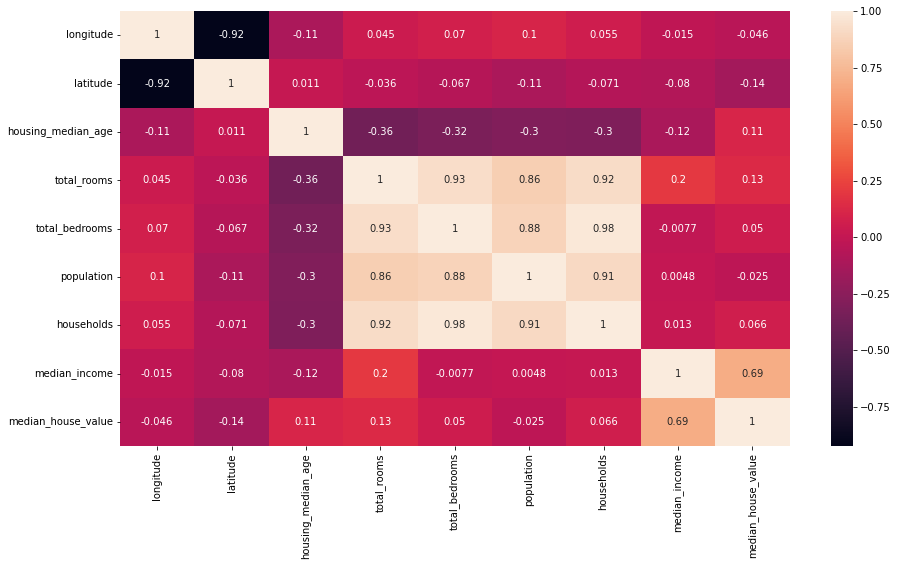

In [19]:
def compute_correlations_matrix_with_seaborn_visualization(data):
  cor=data.corr()
  plt.subplots(figsize=(15,8))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(df)

In [20]:
#Dealing with null values
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [21]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [26]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [27]:
x=df.iloc[:,:-1]
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [28]:
y=df.iloc[:,-1]
y

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32

**Linear Regression**

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [31]:
ypred

array([1.30410972, 1.0507573 , 1.88392955, ..., 1.91743689, 1.7940876 ,
       0.7242268 ])

In [32]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"training score : {train}\nTesting score : {test}")

training score : 0.14024790344508986
Testing score : 0.129509997546164


In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"MAE : {mae}\nMSE : {mse}\nRMSE: {rmse}\nAccuracy : {r2}")

MAE : 1.057721247770108
MSE : 1.7372431123200696
RMSE: 1.3180451859932836
Accuracy : 0.129509997546164


**Decision Tree**

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [36]:
train=dt.score(xtrain,ytrain)
test=dt.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTestingAccuracy:{test}")

Training Accuracy:1.0
TestingAccuracy:0.8686618903248026


In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.9723837209302325
[[2675   26    1   39]
 [  33 1950    0    2]
 [   6    0  673    6]
 [  53    0    5  723]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2741
           1       0.99      0.98      0.98      1985
           3       0.99      0.98      0.99       685
           4       0.94      0.93      0.93       781

    accuracy                           0.97      6192
   macro avg       0.97      0.97      0.97      6192
weighted avg       0.97      0.97      0.97      6192



**Random Forest**

In [38]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(xtrain,ytrain)
ypred=rfr.predict(xtest)

In [39]:
rfr.score(xtrain,ytrain)
rfr.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTestingAccuracy:{test}")

Training Accuracy:1.0
TestingAccuracy:0.8686618903248026


**Hyperparameter Tunning**

In [40]:
#hyperparameter tunning
dt1=DecisionTreeRegressor(max_depth=10)
dt1.fit(xtrain,ytrain)
ypred=dt1.predict(xtest)
print(f"MAE : {mae}\nMSE : {mse}\nRMSE: {rmse}\nAccuracy : {r2}")

MAE : 1.057721247770108
MSE : 1.7372431123200696
RMSE: 1.3180451859932836
Accuracy : 0.129509997546164


In [41]:
train=dt1.score(xtrain,ytrain)
test=dt1.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing Accuracy:{test}')

Training accuracy:0.9735181577632616
 Testing Accuracy:0.8765989198289709
